In [1]:
from qiskit import QuantumCircuit, transpile, Aer
from qiskit.visualization import plot_histogram

import numpy as np

In [2]:
# Constructing constant f0allx

/opt/conda/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


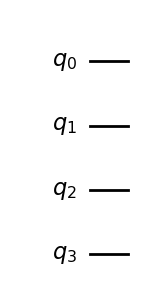

In [3]:
n=3
f0allx = QuantumCircuit(n+1) # constant oracle for f(x)=0 for all x

display(f0allx.draw('mpl'))

In [29]:
# Constructing constant f1allx

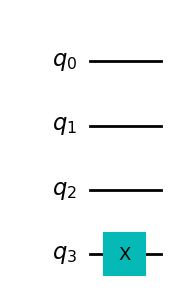

In [30]:
f1allx = QuantumCircuit(n+1) # constant oracle for f(x)=1 for all x
f1allx.x(n)

display(f1allx_2.draw('mpl'))

In [8]:
# because as we saw, applying X-gates to input qubits q0, q1, q2 is equivalent to 
# applying X-gate to ancilla qubit only (which will be initialized to |-> in DJ algorithm)
# because both circuits give the same global phase

In [9]:
# Constructing balanced oracle f01half

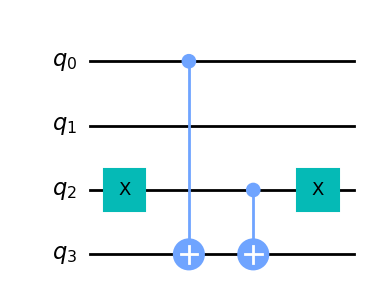

In [10]:
f01half = QuantumCircuit(n+1) # f(x)=0 for half of the inputs and f(x)=1 for other half
xgates = "001" # can be any n-bit string for position of X-gates; "1" means we put an X-gate, "0" means we don't
cxgates= "101" # can be any n-bit string for position of CX-gates; "1" means we put an X-gate, "0" means we don't

# Place X-gates before implementing CX gates in the next loop
for i in range(n):
    if xgates[i] == '1':
        f01half.x(i)

# Place CX-gates to give phase at desired combinations
for m in range(n):
    if cxgates[m] == '1':
        f01half.cx(m,n) # all CX-gates applied of ancilla qubit q_n, controlled by some combination of input qubits

# Place X-gates again to revert to original inputs on 0 to n-1 qubits
for k in range(n):
    if xgates[k] == '1':
        f01half.x(k)

# Show oracle
f01half.draw()

In [11]:
# Implement Deutsch-Josza for constant oracle f0allx

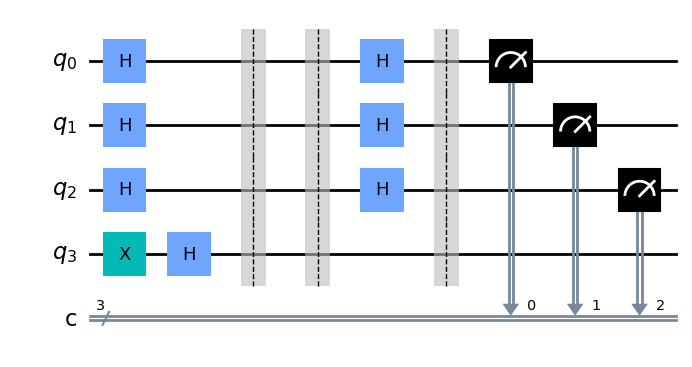

In [12]:
n=3 # number of input qubits
dj1_circuit = QuantumCircuit(n+1, n) # (n+1) th qubit is the ancilla qubit

# Apply H-gates
for qubit in range(n):
    dj1_circuit.h(qubit)

# Put ancilia qubit in state |->
dj1_circuit.x(n)
dj1_circuit.h(n)

dj1_circuit.barrier()

# Add oracle
dj1_circuit = dj1_circuit.compose(f0allx)
dj1_circuit.barrier()

# Repeat H-gates
for qubit in range(n):
    dj1_circuit.h(qubit)
dj1_circuit.barrier()

# Measure
for i in range(n):
    dj1_circuit.measure(i, i)

# Display circuit
dj1_circuit.draw('mpl')

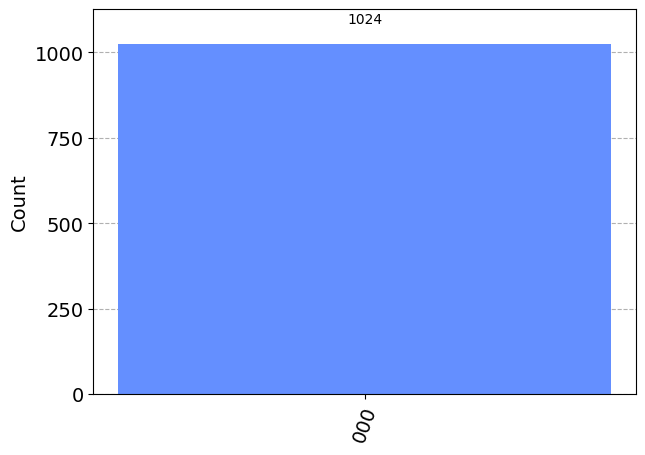

In [13]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
t_dj1_circuit = transpile(dj1_circuit, aer_sim)
results = aer_sim.run(t_dj1_circuit, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [14]:
# Output is all-zero state. Thus, our oracle was indeed constant

In [31]:
# Next, implement Deutsch-Josza for constant oracle f1allx

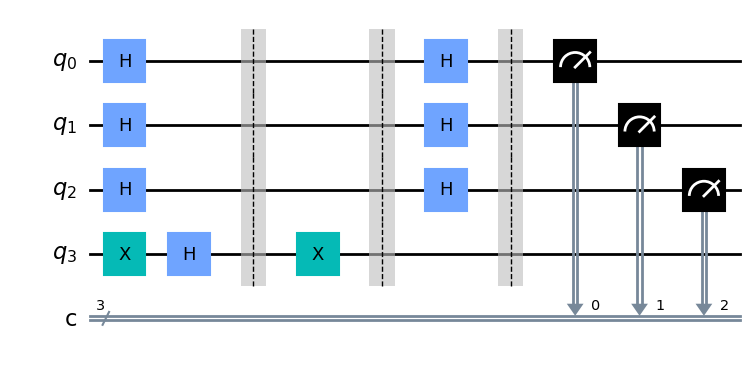

In [32]:
n=3 # number of input qubits
dj2_circuit = QuantumCircuit(n+1, n) # (n+1) th qubit is the ancilla qubit

# Apply H-gates
for qubit in range(n):
    dj2_circuit.h(qubit)

# Put ancilia qubit in state |->
dj2_circuit.x(n)
dj2_circuit.h(n)

dj2_circuit.barrier()

# Add oracle
dj2_circuit = dj2_circuit.compose(f1allx)
dj2_circuit.barrier()

# Repeat H-gates
for qubit in range(n):
    dj2_circuit.h(qubit)
dj2_circuit.barrier()

# Measure
for i in range(n):
    dj2_circuit.measure(i, i)

# Display circuit
dj2_circuit.draw('mpl')

/opt/conda/lib/python3.10/site-packages/qiskit/visualization/circuit/latex.py:154: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, _ = load_style(style)


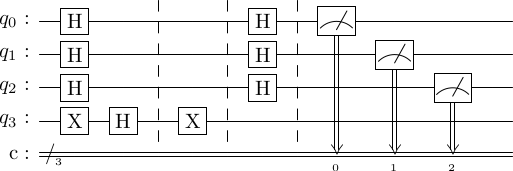

In [37]:
# Display circuit in latex
dj2_circuit.draw('latex')

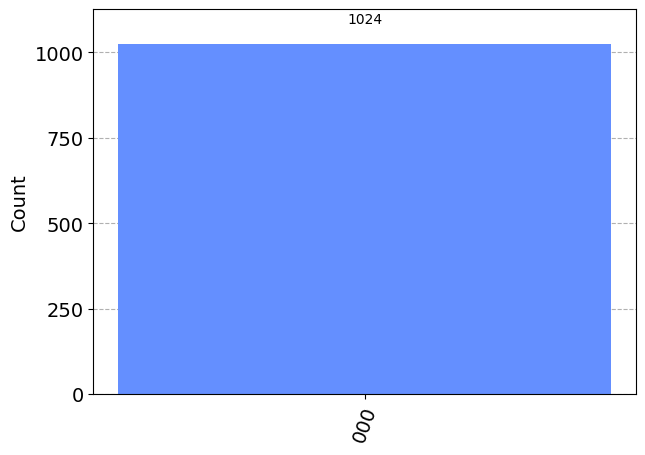

In [33]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
t_dj2_circuit = transpile(dj2_circuit, aer_sim)
results = aer_sim.run(t_dj2_circuit, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [18]:
# Output is all-zero state. Thus, our oracle was indeed constant

In [19]:
# Next, implement Deutsch-Josza for balanced oracle f01half

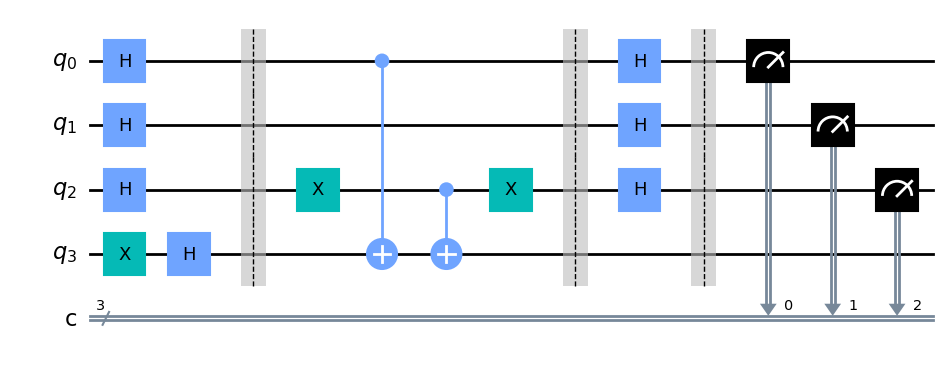

In [20]:
n=3 # number of input qubits
dj3_circuit = QuantumCircuit(n+1, n) # (n+1) th qubit is the ancilla qubit

# Apply H-gates
for qubit in range(n):
    dj3_circuit.h(qubit)

# Put ancilia qubit in state |->
dj3_circuit.x(n)
dj3_circuit.h(n)

dj3_circuit.barrier()

# Add oracle
dj3_circuit = dj3_circuit.compose(f01half)
dj3_circuit.barrier()

# Repeat H-gates
for qubit in range(n):
    dj3_circuit.h(qubit)
dj3_circuit.barrier()

# Measure
for i in range(n):
    dj3_circuit.measure(i, i)

# Display circuit
dj3_circuit.draw('mpl')

/opt/conda/lib/python3.10/site-packages/qiskit/visualization/circuit/latex.py:154: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, _ = load_style(style)


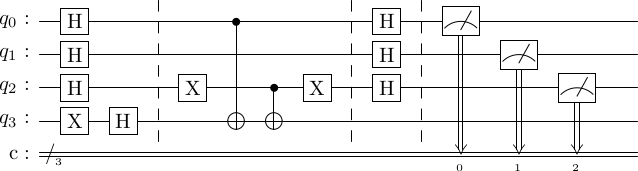

In [36]:
# Display circuit in latex
dj3_circuit.draw('latex')

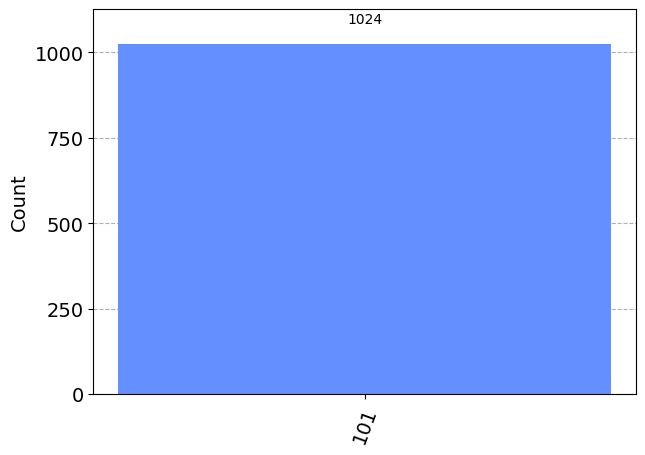

In [21]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
t_dj3_circuit = transpile(dj3_circuit, aer_sim)
results = aer_sim.run(t_dj3_circuit, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [22]:
# Since output state is not all-zero state, the oracle is indeed balanced

In [29]:
# Let us run dj3_circuit on a real quantum device

In [30]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2023-11-29 14:47:55,298: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibm_kyoto


In [31]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_circuit = transpile(dj3_circuit, backend, optimization_level=3)
job = backend.run(transpiled_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


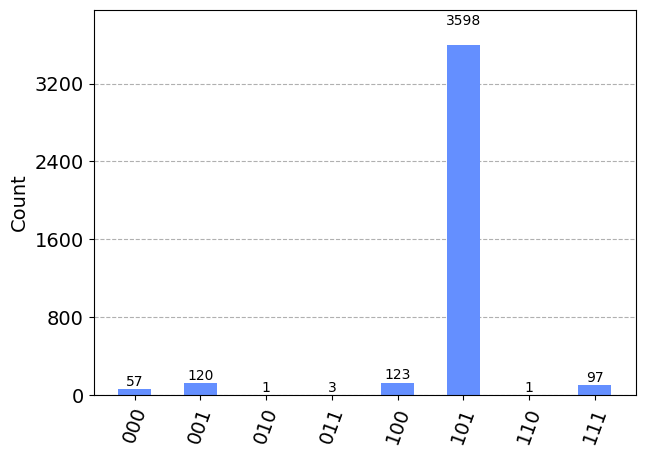

In [32]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

In [33]:
# Output is same as quantum simulator. Hence, oracle is balanced